In [1]:
import LCMGP
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


## Steps:
Generate three types of process through kernels:
- Gaussian -1
- Increasing/Decreasing linear trend
- Gaussian -2
- Generate latent process and a random phi add noise
- Label processes as coming from increasing trend-G1 as 1’s and decreasing trend-G1/G2 as 0’s
- Decreasing inducing point ratio, check classification accuracy 
- Compare with Logistic regression and LDA: Stretch goal


In [2]:
import pickle
f = open("Y_train.pickle","rb")
YBar = (pickle.load(f))
f.close()
f = open("L_train.pickle","rb")
L = (pickle.load(f))
f.close()
f = open("Y_test.pickle","rb")
Y_test = (pickle.load(f))
f.close()
f = open("L_test.pickle","rb")
L_test = (pickle.load(f))
f.close()

This is from synthetic control data set, Even though it has upward slope as well as increasing trend we firsttry to learn only increasing trend

        

### testing Infra:

## Testing the effect of inducing points on classification accuracy

In [ ]:
### 1. IN this data, C=1; P=3

In [13]:
inds  = reversed([0.2,0.3,0.7,0.8])
accuracies = {}
f1Scores = {}
TRreconstruction ={}
TTreconstruction ={}
faultyModel = {}
#Generae Data
#Generate Latent
for ind in inds:
    f1=[]
    accu=[]
    recTr = []
    recTt = []
    print "\n---\n ind:",ind
    for times in range(25):
        # fit the model
        lcgm = LCMGP.LCMGP()
        lcgm.fit(Y=YBar,L=L,N=60,induction=ind,iterations=50)
        # calcualte reconstruction error for training
        recTr.append(reconstructionError(YBar=YBar,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=lcgm.uExpBar))
        # predict for test
        predictions,Expresults, ux = lcgm.predict(Y_test)
        # calcualte reconstruction error for training
        recTt.append(reconstructionError(YBar=Y_test,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=ux))
        print "Result:",np.unique(predictions,return_counts=True),np.unique(L_test,return_counts=True)
        f1s = metrics.f1_score(y_pred=predictions,y_true=L_test)
        f1.append(f1s)
        if f1s < 0.30:
            faultyModel[ind] = lcgm
        accu.append(metrics.accuracy_score(y_pred=predictions,y_true=L_test))
        
    print f1,"\n",accu,f1,recTr
    f1Scores[ind] = np.mean(f1)
    accuracies[ind] = np.mean(accu)
    TRreconstruction[ind] = np.mean(recTr)
    TTreconstruction[ind] =np.mean(recTt)
#plt.plot(induction,results)


---
 ind: 0.8
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([203,  37])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([206,  34])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([208,  32])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([208,  32])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([210,  30])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([206,  34])) (array([-1.,  1.]), array([202,  38]))
Model initialized with  0.8 induction ratio
50 updates
Result: (array([-1.,  1.]), array([206,  34])) (array([-1.,  1.]), array([202,  38])

In [4]:
%matplotlib inline
import numpy as np
def reconstructionError(YBar,uExpBar,phiHatExpBar):
    totalError = 0
    for s in range(YBar.shape[0]):
        totalError += np.sum(np.abs(YBar[s] - uExpBar[s]*phiHatExpBar.T))
    return totalError/YBar.shape[0]

In [12]:
l1 = faultyModel[0.8]

In [20]:
p,lt,ux = l1.predict(Y_test)


In [6]:
plt.plot(f1)

{}

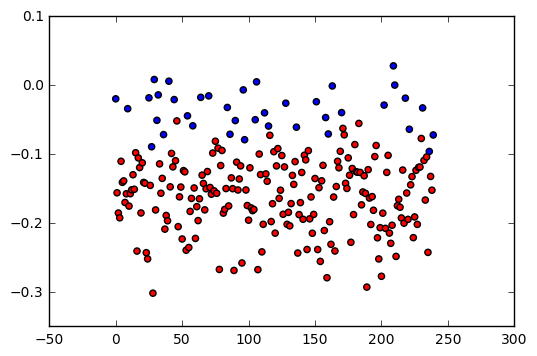

In [22]:
plt.scatter(range(lt.shape[0]),lt,c= ['r' if lt < 0 else 'b'  for lt in L_test])
#plt.plot(newYtest[9].T)

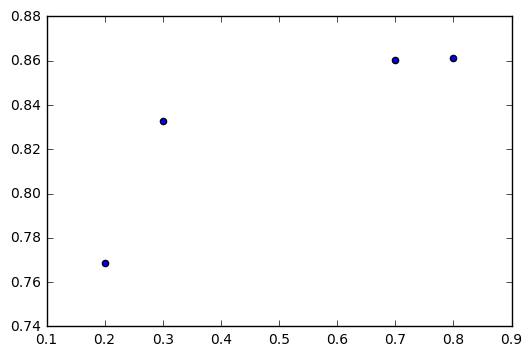

In [18]:
plt.scatter(f1Scores.keys(),f1Scores.values())
#plt.scatter(accuracies.keys(),accuracies.values(),color='red')

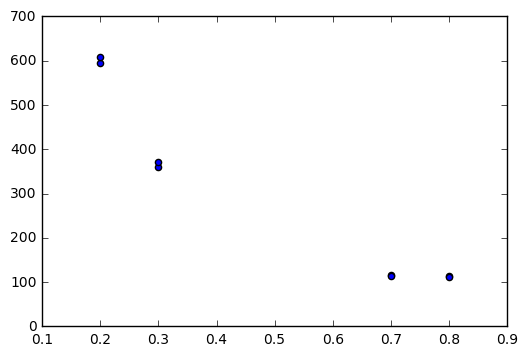

In [12]:
plt.scatter(TTreconstruction.keys(),TTreconstruction.values())
plt.scatter(TRreconstruction.keys(),TRreconstruction.values())

In [73]:
newYtest = ux*l1.phiHatExpBar.T
newYHat = ux*l1.WHatExp.T + l1.BHatExp[0,0]
reconstructionError(YBar=YBar,phiHatExpBar=l1.phiHatExpBar,uExpBar=l1.uExpBar)

107.73239174928912

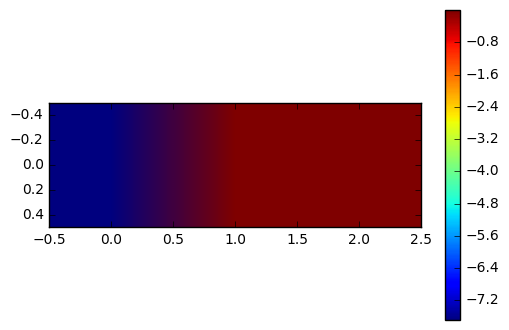

In [13]:
plt.imshow(l1.phiHatExp)
plt.colorbar()

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5882: UserWarning:2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 3)


([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([ -8.12737940e+00,  -7.31462586e+00,  -6.50187232e+00,
         -5.68911877e+00,  -4.87636523e+00,  -4.06361169e+00,
         -3.25085814e+00,  -2.43810460e+00,  -1.62535106e+00,
         -8.12597513e-01,   1.56029782e-04]),
 <a list of 3 Lists of Patches objects>)

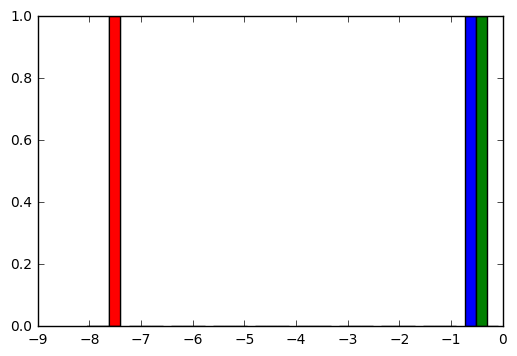

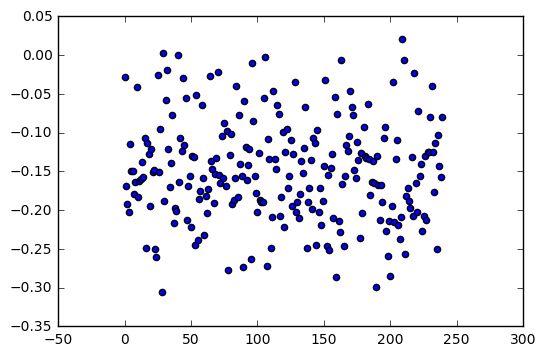

In [55]:
plt.scatter(range(lt.shape[0]),lt)

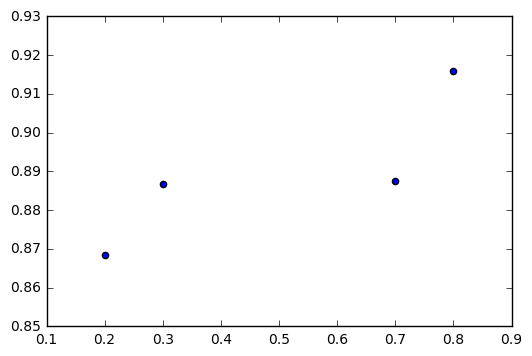

In [35]:
plt.scatter(accuracies.keys(),accuracies.values())
#plt.scatter(TTreconstruction.keys(),TTreconstruction.values())

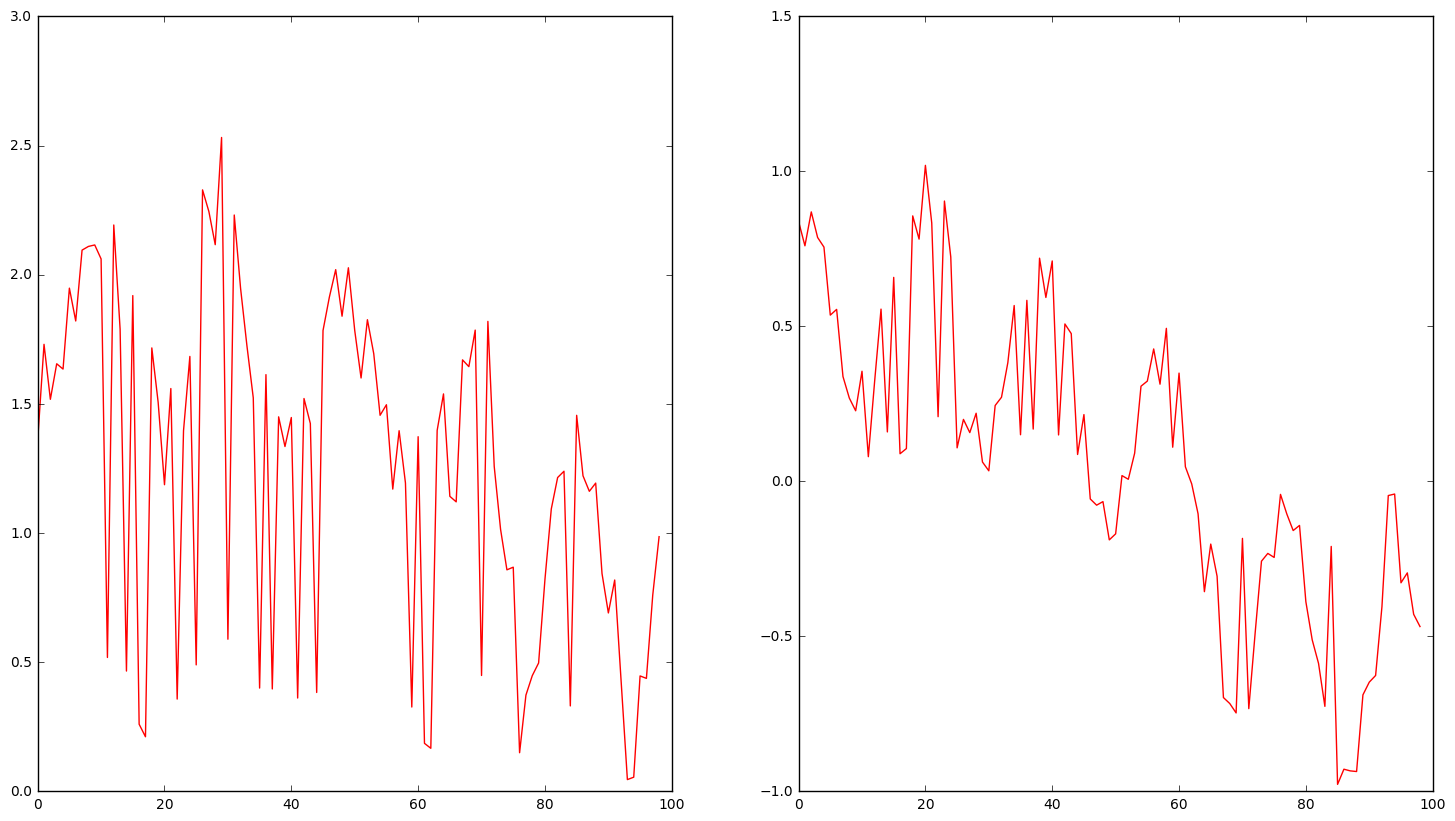

In [42]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,10))
p=0
axes[0].plot(myModel.uExpBar[0,p*N:p*N+N-1].T,c='r')
p=4
axes[1].plot(myModel.uExpBar[0,p*N:p*N+N-1].T,c='r')

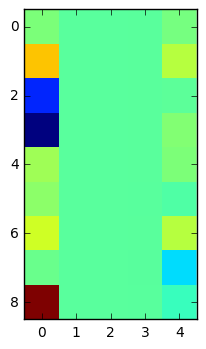

In [36]:
plt.imshow(myModel.phiHatExp,interpolation='None')

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning:covariance is not positive-semidefinite.


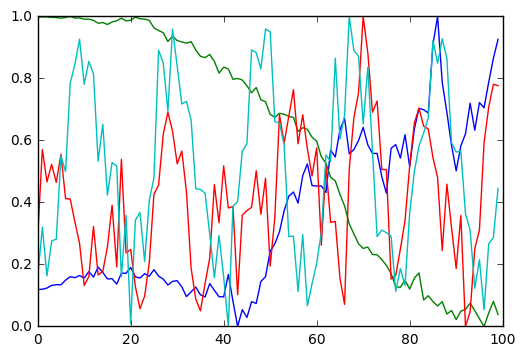

In [28]:
#latent = list(generatelatent(N=N))
for l in latent:
    plt.plot(l)